<a href="https://colab.research.google.com/github/Git-Hub-Pro/ML-using-keras/blob/master/CIFAR10dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.utils.np_utils import to_categorical
from keras.models import Sequential,load_model, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [0]:
# 60000개 32x32 color images in 10 classes // color 이미지에 관련된 딥러닝 알고리즘

In [3]:
from keras.datasets import cifar10

(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

X_test.shape

(10000, 32, 32, 3)

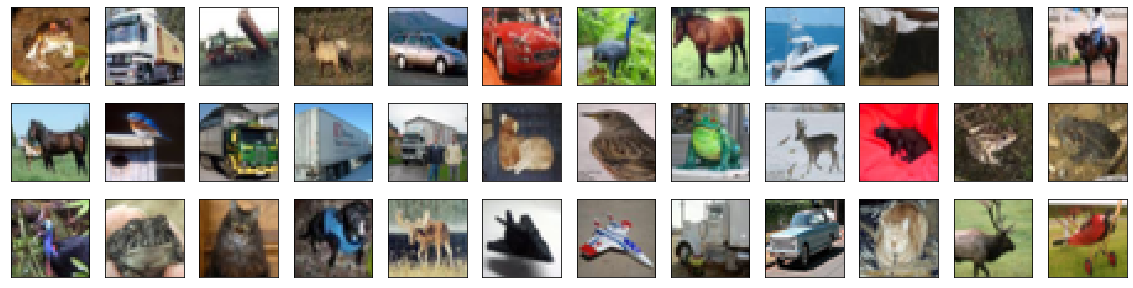

In [11]:
fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3,12,i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [13]:
X_train.shape
X_train[0,0,0]

array([59, 62, 63], dtype=uint8)

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [15]:
Y_train[0]

array([6], dtype=uint8)

In [0]:
Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test) 

In [22]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=4,padding='same',strides=1,activation='relu',input_shape=(32,32,3,)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=4,padding='same',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=4,padding='same',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        784       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          32832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [0]:
model.fit(X_train,Y_train,batch_size=150,epochs=1,validation_split=0.2)

In [26]:
score = model.evaluate(X_test,Y_test)
print(score)

10000/10000 [==============================] - 1s 80us/step
[1.3739376485824586, 0.5042]


In [0]:
pred = model.predict(X_test)

In [0]:
label =['airplane','automobile','bird','cat',
        'deer','dog','frog','horse','ship','truck']

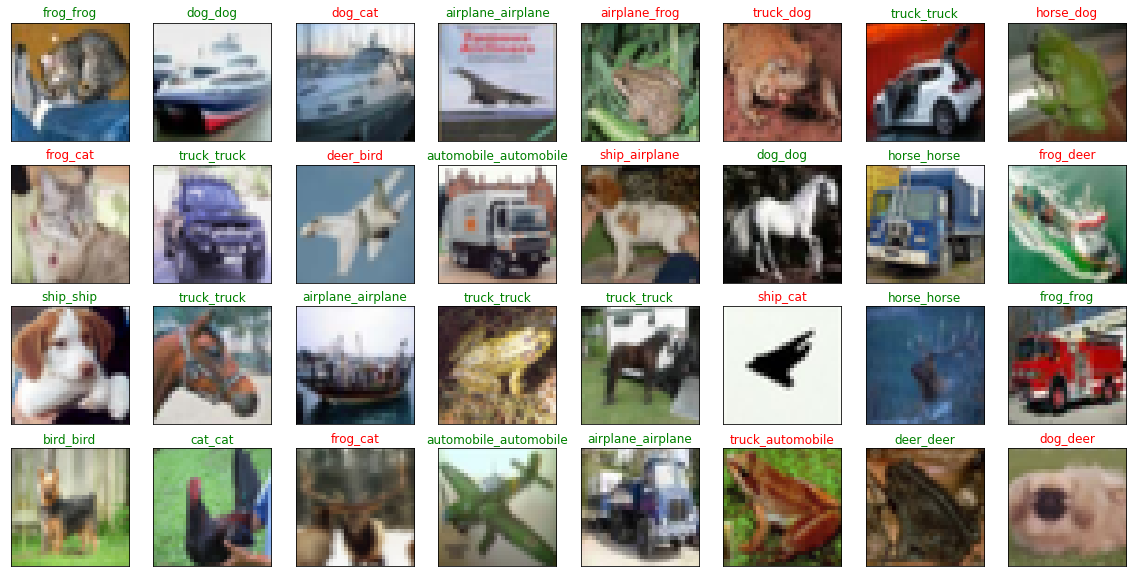

In [38]:
fig = plt.figure(figsize=(20,10))

for i,idx in enumerate(np.random.choice(X_test.shape[0],size=32)):
    ax = fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
    ax.imshow(X_test[i])
    
    pred_idx = np.argmax(pred[idx])
    true_idx = np.argmax(Y_test[idx])

    ax.set_title("{}_{}".format(label[pred_idx],label[true_idx]),color='green' if pred_idx==true_idx else 'red')
